In [4]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time


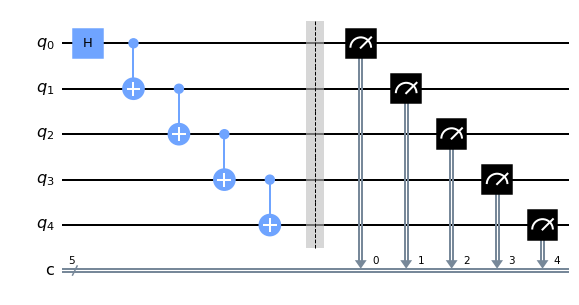

In [3]:
qr = QuantumRegister(5,'q')
cr = ClassicalRegister(5,'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)
qc.cx(3,4)

qc.measure_all(add_bits=False)
qc.draw(output='mpl')

In [5]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [5]:
job_id=[]
job = qpu_backend.run(qc,shots = 1024)
n=0
while n!=10:
    if job.status().name == 'DONE':
        job = qpu_backend.run(qc,shots = 1024)
        n+=1
    else:
        time.sleep(300)



In [6]:
job_ret = qpu_backend.retrieve_job('e6af206c-9083-4866-b04f-c6f18dbbf39b')

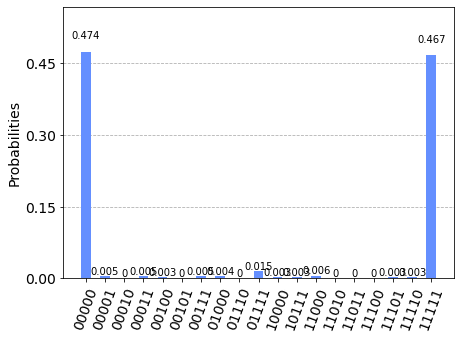

In [242]:
probs = job_ret.get_probabilities()
counts = job_ret.get_counts()
plot_histogram(counts, sort='asc', bar_labels=True)

In [214]:
row=[]
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                for m in range(2):
                    row.append(str(i)+str(j)+str(k)+str(l)+str(m))

In [243]:
for i in range(32):
    if row[i] not in probs.keys():
        probs[row[i]] = 0

In [244]:
probs_tup = sorted(probs.items())

In [245]:
probs_list = []
for i in range(32):
    a=probs_tup[i][1]
    probs_list.append(a)

In [246]:
probs_arr = np.array(probs_list)

In [ ]:
all_probs = probs_arr

In [247]:
all_probs = np.vstack((all_probs,probs_arr))

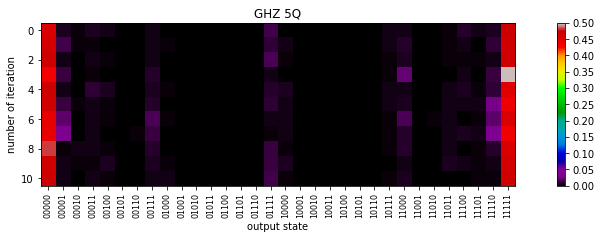

In [277]:
plt.figure(figsize=(15,3))
plt.imshow(all_probs,cmap='nipy_spectral')
plt.clim(0,0.5)
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 8)
plt.xlabel('output state')
plt.ylabel('number of iteration')
plt.title('GHZ 5Q')

plt.colorbar(ticks=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5])
plt.show()

In [7]:
job_ret.job_id()

'e6af206c-9083-4866-b04f-c6f18dbbf39b'